# ML: Regresión Logística

## Universidad Cooperativa de Colombia - Sede Cali

### Predicción de Diabetes con Regresión Logística

**Objetivo:** Aprender a implementar un modelo de clasificación de Machine Learning utilizando Regresión Logística para predecir la aparición de diabetes, siguiendo la metodología CRISP-DM.

## Introducción a la Regresión Logística

La **Regresión Logística** es un algoritmo de **aprendizaje supervisado** que se utiliza para problemas de **clasificación**. A pesar de su nombre, no se usa para regresión (predecir valores continuos), sino para predecir una variable categórica (una etiqueta).

**¿Cuándo usarlo?**

Se utiliza cuando la variable que queremos predecir es binaria, es decir, solo puede tomar dos valores. Por ejemplo:

*   Sí/No (ej. ¿El paciente tiene diabetes?)
*   Verdadero/Falso
*   0/1
*   Spam/No Spam

El algoritmo funciona calculando la probabilidad de que una observación pertenezca a una de las dos clases. Si la probabilidad supera un umbral (normalmente 0.5), se asigna a la clase 1; de lo contrario, a la clase 0.

## Metodología CRISP-DM

CRISP-DM (Cross-Industry Standard Process for Data Mining) es un modelo de proceso estándar de la industria que describe los enfoques comunes que los expertos en minería de datos utilizan. Seguiremos sus 6 fases:

1.  **Comprensión del Negocio (Business Understanding)**
2.  **Comprensión de los Datos (Data Understanding)**
3.  **Preparación de los Datos (Data Preparation)**
4.  **Modelado (Modeling)**
5.  **Evaluación (Evaluation)**
6.  **Despliegue (Deployment)**

### Fase 1: Comprensión del Negocio

**Objetivo:** Predecir si un paciente tiene diabetes basándose en ciertas mediciones diagnósticas. Esto es importante para la detección temprana y el tratamiento de la enfermedad.

**¿Qué es la diabetes?**

La diabetes es una enfermedad crónica que ocurre cuando el páncreas no produce suficiente insulina o cuando el cuerpo no puede utilizar eficazmente la insulina que produce. La insulina es una hormona que regula el azúcar en la sangre. El efecto de la diabetes no controlada es la hiperglucemia (aumento del azúcar en la sangre), que con el tiempo daña gravemente muchos órganos y sistemas del cuerpo, especialmente los nervios y los vasos sanguíneos.

**¿Cómo se mide?**

La diabetes se diagnostica comúnmente a través de pruebas de glucosa en sangre. Los niveles de glucosa en ayunas, la prueba de tolerancia a la glucosa oral (OGTT) y la hemoglobina A1c (HbA1c) son algunas de las pruebas más comunes. Nuestro dataset incluirá algunas de estas mediciones, así como otros factores de riesgo conocidos.

### Fase 2: Comprensión de los Datos

En esta fase, cargaremos el dataset y realizaremos un análisis exploratorio inicial para entender su estructura, contenido y calidad.

#### Carga del Dataset

**¿Qué hace este código?**

Este bloque de código importa las librerías necesarias (pandas para manipulación de datos y numpy para operaciones numéricas) y carga el archivo CSV que contiene los datos de diabetes. En Google Colab, primero debes subir el archivo `diabetes_dataset.csv` a tu entorno.

**Resultado esperado:** Un DataFrame de pandas con los datos de diabetes cargados en memoria.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Para cargar el archivo en Google Colab, primero súbelo usando el panel de archivos
# o ejecuta el siguiente código para subir archivos:
uploaded = files.upload()

# Cargar el dataset desde el archivo CSV
# Assuming the uploaded file is named 'diabetes_dataset.csv'
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)


print(f"Dataset cargado exitosamente. Forma del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}")

Saving diabetes_dataset.csv to diabetes_dataset.csv
User uploaded file "diabetes_dataset.csv" with length 4723 bytes
Dataset cargado exitosamente. Forma del dataset: (152, 9)
Número de filas: 152, Número de columnas: 9


#### Diccionario de Datos

Es fundamental entender qué representa cada variable en nuestro dataset:

| Característica           | Descripción                                                                 | Tipo de Dato |
| :----------------------- | :-------------------------------------------------------------------------- | :----------- |
| `Pregnancies`            | Número de veces que ha estado embarazada.                                   | Numérico     |
| `Glucose`                | Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa. | Numérico     |
| `BloodPressure`          | Presión arterial diastólica (mm Hg).                                        | Numérico     |
| `SkinThickness`          | Grosor del pliegue cutáneo del tríceps (mm).                                | Numérico     |
| `Insulin`                | Insulina sérica de 2 horas (mu U/ml).                                       | Numérico     |
| `BMI`                    | Índice de Masa Corporal (peso en kg / (altura en m)^2).                     | Numérico     |
| `DiabetesPedigreeFunction` | Función de pedigrí de diabetes (una medida de la predisposición genética).  | Numérico     |
| `Age`                    | Edad (años).                                                                | Numérico     |
| `Outcome`                | Variable de clase (0 = No diabético, 1 = Diabético).                        | Categórico   |

#### Exploración Inicial de los Datos

**¿Qué hace este código?**

Visualiza las primeras 5 filas del dataset para tener una idea inicial de cómo se ven los datos.

**Resultado esperado:** Una tabla con las primeras 5 filas del dataset, mostrando todas las columnas y sus valores.

In [ ]:
# Visualizar las primeras 5 filas del DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**¿Qué hace este código?**

Proporciona información general sobre el dataset: tipos de datos, número de valores no nulos, y uso de memoria.

**Resultado esperado:** Un resumen que muestra el tipo de dato de cada columna y si hay valores nulos.

In [ ]:
# Obtener información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               152 non-null    int64  
 1   Glucose                   152 non-null    int64  
 2   BloodPressure             152 non-null    int64  
 3   SkinThickness             152 non-null    int64  
 4   Insulin                   152 non-null    int64  
 5   BMI                       152 non-null    float64
 6   DiabetesPedigreeFunction  152 non-null    float64
 7   Age                       152 non-null    int64  
 8   Outcome                   152 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 10.8 KB


**Observaciones iniciales:**

*   El dataset tiene 152 filas y 9 columnas.
*   Todas las columnas son numéricas, lo cual es bueno para el modelado. Sin embargo, `Outcome` es en realidad una variable categórica.
*   No parece haber valores nulos a primera vista (según `df.info()`), pero esto puede ser engañoso. A veces, los valores faltantes se representan con `0`, lo cual no tiene sentido para algunas variables como `Glucose` o `BloodPressure`.

**¿Qué hace este código?**

Calcula estadísticas descriptivas (media, desviación estándar, mínimo, máximo, cuartiles) para todas las variables numéricas.

**Resultado esperado:** Una tabla con estadísticas descriptivas que nos ayudará a identificar posibles problemas en los datos.

In [ ]:
# Resumen estadístico de las variables numéricas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,4.394737,120.026316,72.342105,20.368421,72.618421,31.426974,0.429283,34.947368,0.368421
std,3.632374,27.684109,17.413592,15.544716,107.098329,6.653237,0.304807,11.350403,0.483971
min,0.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,101.000000,66.000000,0.000000,0.000000,26.575000,0.242500,26.000000,0.000000
50%,3.000000,111.500000,74.500000,21.500000,0.000000,32.000000,0.326000,32.000000,0.000000
75%,7.000000,130.000000,84.000000,33.000000,120.000000,36.075000,0.526000,43.000000,1.000000
max,13.000000,197.000000,96.000000,48.000000,846.000000,45.800000,2.288000,66.000000,1.000000


**Observaciones del resumen estadístico:**

*   **Valores mínimos de 0:** Las columnas `BloodPressure`, `SkinThickness`, `Insulin` y `BMI` tienen valores mínimos de 0. Esto es biológicamente imposible y sugiere que los ceros se están utilizando para representar datos faltantes. Esto deberá ser tratado en la fase de preparación de datos.
*   **Valores máximos (posibles datos atípicos):** La columna `Insulin` tiene un valor máximo muy alto. `DiabetesPedigreeFunction` también tiene un valor máximo que parece un dato atípico en comparación con la media. Estos valores deberán ser investigados.

**¿Qué hace este código?**

Cuenta cuántos casos hay de cada clase en la variable objetivo (diabético vs no diabético).

**Resultado esperado:** Un conteo que muestra la distribución de clases en nuestro dataset.

In [ ]:
# Contar los valores en la variable objetivo (Outcome)
print("Distribución de la variable objetivo:")
print(df["Outcome"].value_counts())
print("\nPorcentajes:")
print(df["Outcome"].value_counts(normalize=True) * 100)

Distribución de la variable objetivo:
Outcome
0    96
1    56
Name: count, dtype: int64

Porcentajes:
Outcome
0    63.157895
1    36.842105
Name: proportion, dtype: float64


**Observaciones de la variable objetivo:**

*   El dataset está algo desbalanceado, con más casos de no diabéticos (0) que de diabéticos (1). Esto es común en datasets médicos y es algo a tener en cuenta durante el modelado y la evaluación.

### Fase 3: Preparación de los Datos

Esta es una de las fases más importantes. Aquí limpiaremos los datos, manejaremos los valores faltantes y atípicos, y prepararemos el dataset para el modelado.

#### 3.1. Manejo de Valores Faltantes (representados como 0)

Como identificamos anteriormente, las columnas `BloodPressure`, `SkinThickness`, `Insulin` y `BMI` tienen ceros que probablemente representan datos faltantes. Reemplazaremos estos ceros con `NaN` (Not a Number) para poder manejarlos adecuadamente.

**¿Qué hace este código?**

Reemplaza los valores 0 con NaN (valores nulos) en las columnas donde 0 no es biológicamente posible, y luego cuenta cuántos valores nulos tenemos en cada columna.

**Resultado esperado:** Un conteo de valores nulos por columna, mostrando dónde tenemos datos faltantes.

In [ ]:
import numpy as np

# Definir las columnas que pueden tener ceros como valores faltantes
cols_con_ceros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Reemplazar 0 con NaN en estas columnas
df[cols_con_ceros] = df[cols_con_ceros].replace(0, np.nan)

# Verificar cuántos valores nulos tenemos ahora
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)

Valores nulos por columna:
Pregnancies                  0
Glucose                      0
BloodPressure                4
SkinThickness               43
Insulin                     79
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

Porcentaje de valores nulos por columna:
Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                2.631579
SkinThickness               28.289474
Insulin                     51.973684
BMI                          0.657895
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


Ahora que tenemos los valores faltantes como `NaN`, podemos decidir cómo imputarlos. Una estrategia común es reemplazar los `NaN` con la media o la mediana de la columna. La mediana es generalmente más robusta a los datos atípicos.

In [ ]:
# Ver si existe al menos un NaN en todo el dataset
print(df.isnull().values.any())

True


**¿Qué hace este código?**

Rellena los valores nulos con la mediana de cada columna. La mediana es menos sensible a valores extremos que la media.

**Resultado esperado:** Un dataset sin valores nulos, donde los valores faltantes han sido reemplazados por la mediana de cada columna.

In [ ]:
# Imputar los valores nulos con la mediana de cada columna
for col in cols_con_ceros:
    mediana = df[col].median()
    df[col].fillna(mediana, inplace=True)
    print(f"Columna {col}: valores nulos rellenados con mediana = {mediana:.2f}")

Columna Glucose: valores nulos rellenados con mediana = 111.50
Columna BloodPressure: valores nulos rellenados con mediana = 75.50
Columna SkinThickness: valores nulos rellenados con mediana = 29.00
Columna Insulin: valores nulos rellenados con mediana = 140.00
Columna BMI: valores nulos rellenados con mediana = 32.00


/tmp/ipython-input-880791201.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana, inplace=True)


**¿Qué hace este código?**

Verifica que ya no hay valores nulos en el dataset después de la imputación.

**Resultado esperado:** Todos los valores deben ser 0, indicando que no hay valores nulos.

In [ ]:
# Verificar que ya no hay valores nulos
print("Verificación - Valores nulos después de la imputación:")
print(df.isnull().sum())

Verificación - Valores nulos después de la imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### 3.2. Manejo de Datos Atípicos (Outliers)

Los datos atípicos pueden afectar negativamente el rendimiento del modelo. Podemos visualizarlos usando box plots y luego decidir cómo manejarlos. Una estrategia común es reemplazar los outliers con un valor límite (capping).

**¿Qué hace este código?**

Crea un gráfico de cajas (box plot) para visualizar la distribución de todas las variables y identificar valores atípicos.

**Resultado esperado:** Un gráfico que muestra la distribución de cada variable, donde los puntos fuera de las "cajas" representan valores atípicos.

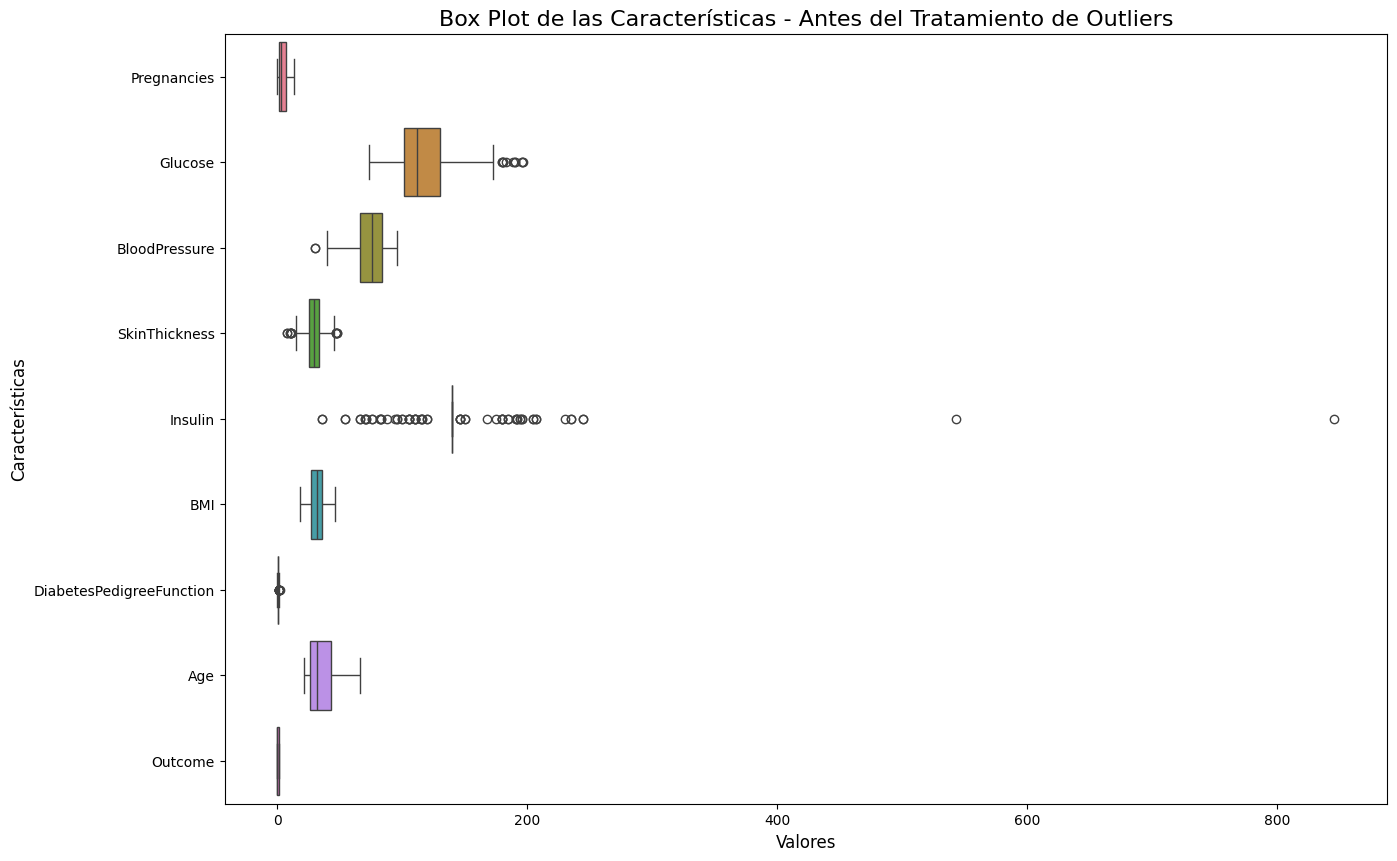

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

# Crear box plot para visualizar outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title("Box Plot de las Características - Antes del Tratamiento de Outliers", fontsize=16)
plt.xlabel("Valores", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.show()

**Observaciones de los Box Plots:**

*   Se pueden observar outliers en varias columnas, como `Insulin`, `SkinThickness`, etc.

Vamos a aplicar una técnica de capping para limitar los valores extremos. Usaremos el Rango Intercuartílico (IQR) para definir los límites.

**¿Qué hace este código?**

Aplica la técnica de "capping" para limitar los valores extremos. Calcula el rango intercuartílico (IQR) y establece límites superior e inferior para cada variable, reemplazando los valores que excedan estos límites.

**Resultado esperado:** Los valores extremos serán limitados a los valores de los límites calculados, reduciendo el impacto de los outliers.

In [ ]:
# Aplicar capping de outliers usando el método IQR
for col in df.columns.drop("Outcome"):
    Q1 = df[col].quantile(0.25)  # Primer cuartil
    Q3 = df[col].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    # Contar outliers antes del capping
    outliers_antes = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # Aplicar capping
    df[col] = np.clip(df[col], lower_bound, upper_bound)

    print(f"{col}: {outliers_antes} outliers tratados. Rango: [{lower_bound:.2f}, {upper_bound:.2f}]")

Pregnancies: 0 outliers tratados. Rango: [-8.00, 16.00]
Glucose: 11 outliers tratados. Rango: [57.50, 173.50]
BloodPressure: 2 outliers tratados. Rango: [39.00, 111.00]
SkinThickness: 13 outliers tratados. Rango: [13.00, 45.00]
Insulin: 69 outliers tratados. Rango: [140.00, 140.00]
BMI: 0 outliers tratados. Rango: [13.32, 49.73]
DiabetesPedigreeFunction: 10 outliers tratados. Rango: [-0.18, 0.95]
Age: 0 outliers tratados. Rango: [0.50, 68.50]


**¿Qué hace este código?**

Crea un nuevo box plot para visualizar cómo se ven los datos después del tratamiento de outliers.

**Resultado esperado:** Un gráfico que muestra una distribución más "limpia" con menos valores extremos.

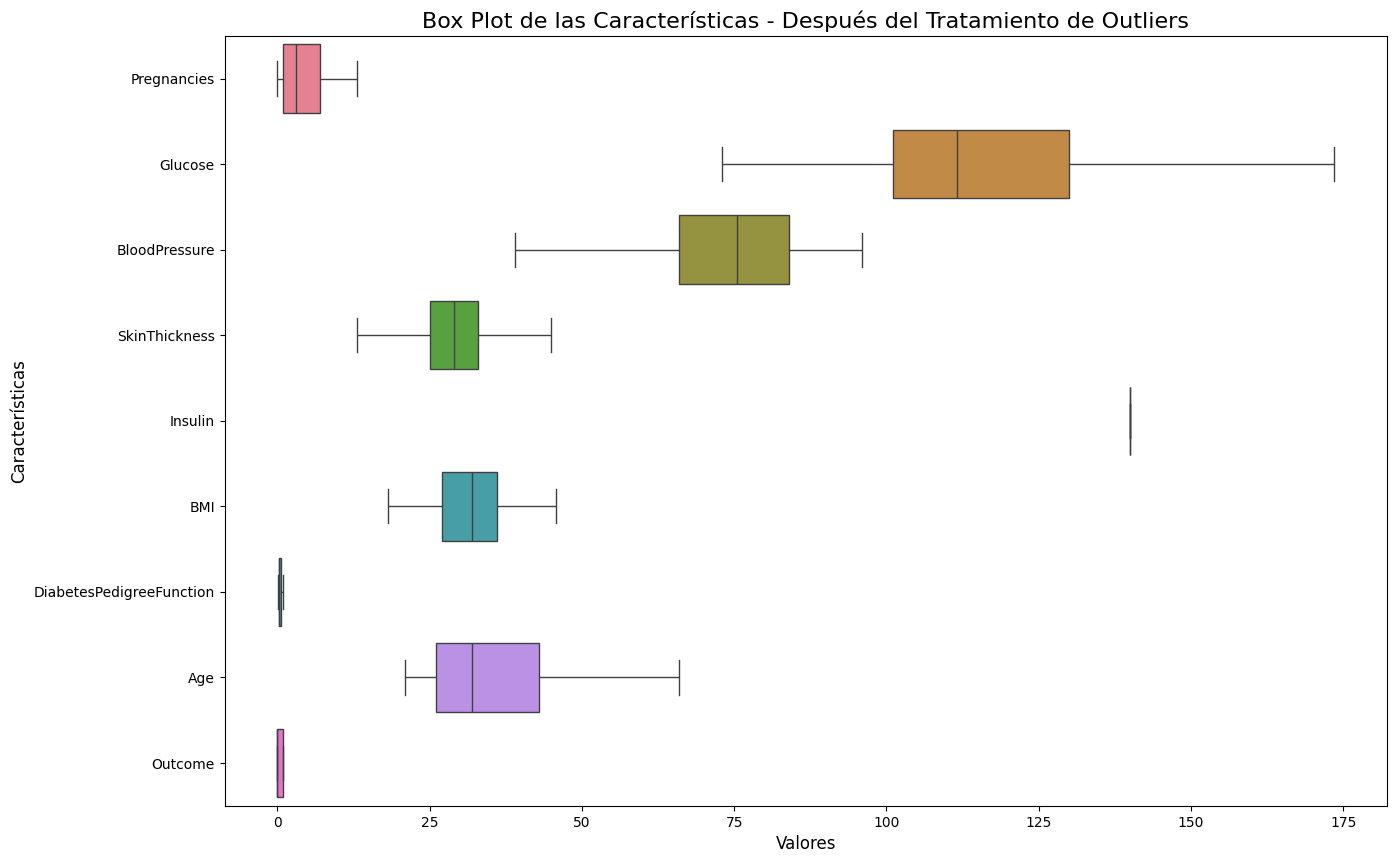

In [ ]:
# Visualizar los box plots después del capping
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title("Box Plot de las Características - Después del Tratamiento de Outliers", fontsize=16)
plt.xlabel("Valores", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.show()

#### 3.3. Escalado de Características

Dado que las características tienen diferentes rangos de valores, es importante escalarlas para que el modelo de Regresión Logística no se vea sesgado por las características con valores más grandes. Usaremos `StandardScaler` de scikit-learn, que estandariza las características para que tengan una media de 0 y una desviación estándar de 1.

**¿Qué hace este código?**

Separa las características (X) de la variable objetivo (y), y luego aplica escalado estándar a las características. Esto normaliza todas las variables para que tengan media 0 y desviación estándar 1.

**Resultado esperado:** Las características estarán en la misma escala, lo que mejorará el rendimiento del algoritmo de regresión logística.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar características (X) y variable objetivo (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

# Aplicar escalado estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame para facilitar la visualización
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nEscalado completado. Estadísticas de las características escaladas:")
print(f"Media: {X_scaled.mean().round(2).tolist()}")
print(f"Desviación estándar: {X_scaled.std().round(2).tolist()}")

Características (X): (152, 8)
Variable objetivo (y): (152,)

Escalado completado. Estadísticas de las características escaladas:
Media: [0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0]
Desviación estándar: [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]


**¿Qué hace este código?**

Muestra las primeras filas de los datos escalados para verificar que el escalado se aplicó correctamente.

**Resultado esperado:** Los valores ahora estarán centrados alrededor de 0 y tendrán una escala similar.

In [ ]:
# Mostrar las primeras filas de los datos escalados
print("Primeras 5 filas de los datos escalados:")
X_scaled.head()

Primeras 5 filas de los datos escalados:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.443393,1.151090,-0.199571,0.768831,0.0,0.320755,0.966323,1.330560
1,-0.937667,-1.350405,-0.688840,0.042226,0.0,-0.823340,-0.245846,-0.348923
2,0.995817,2.163600,-0.851930,0.042226,0.0,-1.362700,1.163960,-0.260529
3,-0.937667,-1.191580,-0.688840,-0.684379,0.0,-0.578177,-1.053959,-1.232862
4,-1.213880,0.714321,-2.809010,0.768831,0.0,1.873457,2.390403,-0.172135


#### 3.4. Matriz de Correlación

La matriz de correlación nos ayuda a entender la relación lineal entre las diferentes características. Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente. Valores cercanos a 0 indican poca o ninguna correlación. Es útil para identificar posibles multicolinealidades o para entender qué características podrían ser más predictivas.

**Interpretación:**

*   **Correlación Positiva (cercana a 1):** Cuando una variable aumenta, la otra también tiende a aumentar.
*   **Correlación Negativa (cercana a -1):** Cuando una variable aumenta, la otra tiende a disminuir.
*   **Correlación Nula (cercana a 0):** No hay una relación lineal clara entre las variables.

En nuestro caso, también es importante observar la correlación de cada característica con la variable `Outcome` (diabetes).

**¿Qué hace este código?**

Calcula la matriz de correlación entre todas las variables y la visualiza como un mapa de calor. Esto nos ayuda a entender las relaciones entre las variables.

**Resultado esperado:** Un mapa de calor que muestra las correlaciones entre variables, donde los colores más intensos indican correlaciones más fuertes.

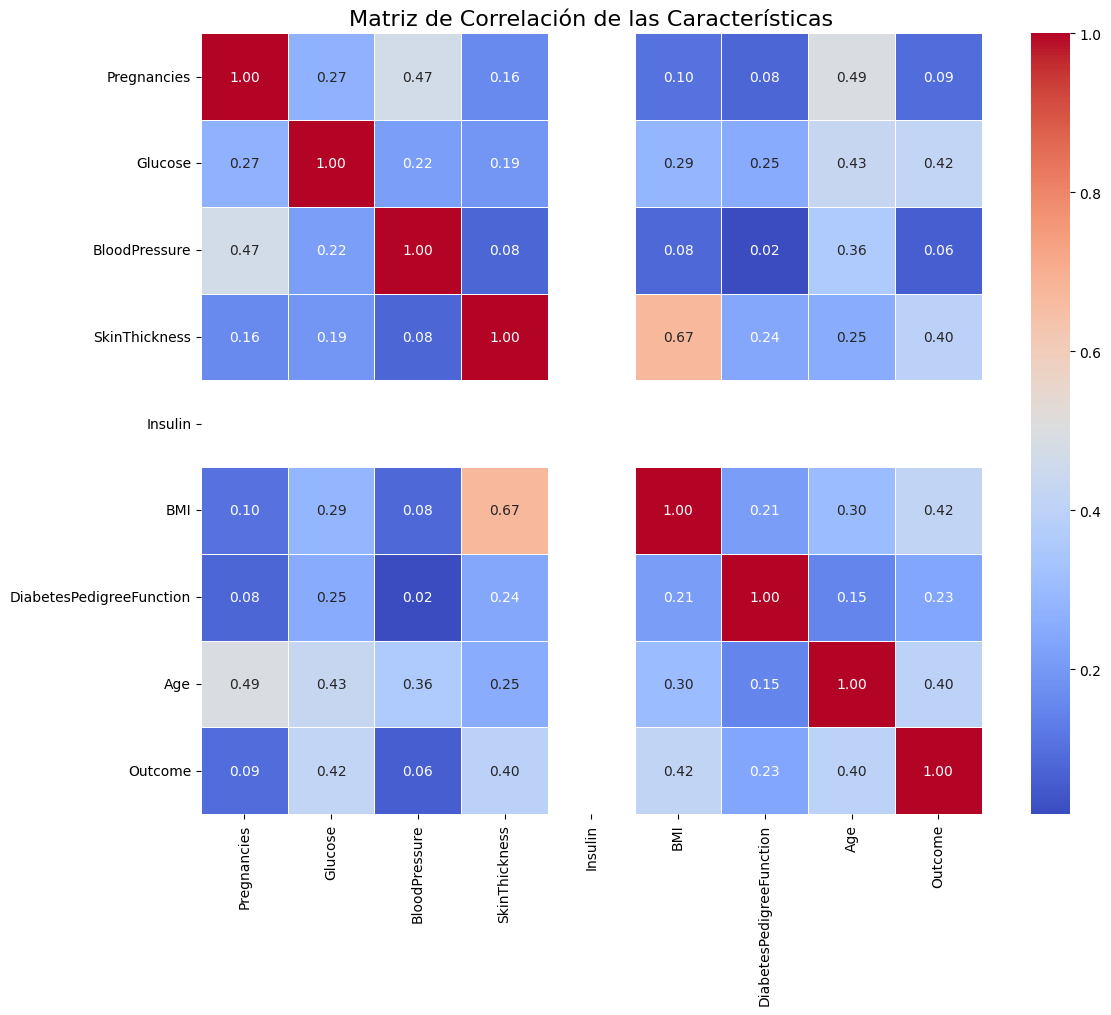


Correlaciones con la variable objetivo (Outcome):
Glucose: 0.418
BMI: 0.417
Age: 0.399
SkinThickness: 0.397
DiabetesPedigreeFunction: 0.234
Pregnancies: 0.094
BloodPressure: 0.056
Insulin: nan


In [ ]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            square=True, linewidths=0.5)
plt.title("Matriz de Correlación de las Características", fontsize=16)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones con la variable objetivo
print("\nCorrelaciones con la variable objetivo (Outcome):")
correlaciones_outcome = corr_matrix["Outcome"].drop("Outcome").sort_values(key=abs, ascending=False)
for variable, correlacion in correlaciones_outcome.items():
    print(f"{variable}: {correlacion:.3f}")

### Fase 4: Modelado

En esta fase, dividiremos nuestros datos en conjuntos de entrenamiento y prueba, y luego entrenaremos nuestro modelo de Regresión Logística.

#### 4.1. División de Datos (Entrenamiento y Prueba)

Es crucial dividir el dataset en dos partes: un conjunto de entrenamiento (para que el modelo aprenda) y un conjunto de prueba (para evaluar qué tan bien generaliza el modelo a datos no vistos). Usaremos una división 70/30.

**¿Qué hace este código?**

Divide el dataset en conjuntos de entrenamiento (70%) y prueba (30%). El parámetro `stratify=y` asegura que la proporción de clases sea la misma en ambos conjuntos.

**Resultado esperado:** Cuatro conjuntos de datos: características de entrenamiento, características de prueba, etiquetas de entrenamiento y etiquetas de prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} registros ({X_test.shape[0]/len(df)*100:.1f}%)")

print(f"\nDistribución de clases en entrenamiento:")
print(y_train.value_counts())
print(f"\nDistribución de clases en prueba:")
print(y_test.value_counts())

Tamaño del conjunto de entrenamiento: 106 registros (69.7%)
Tamaño del conjunto de prueba: 46 registros (30.3%)

Distribución de clases en entrenamiento:
Outcome
0    67
1    39
Name: count, dtype: int64

Distribución de clases en prueba:
Outcome
0    29
1    17
Name: count, dtype: int64


**Nota sobre `stratify=y`:** Esto asegura que la proporción de clases (diabéticos/no diabéticos) sea la misma en los conjuntos de entrenamiento y prueba que en el dataset original. Esto es importante en datasets desbalanceados.

#### 4.2. Entrenamiento del Modelo de Regresión Logística

Ahora instanciamos y entrenamos nuestro modelo de Regresión Logística con los datos de entrenamiento.

**¿Qué hace este código?**

Crea una instancia del modelo de Regresión Logística y lo entrena con los datos de entrenamiento. El modelo aprenderá los patrones en los datos para hacer predicciones.

**Resultado esperado:** Un modelo entrenado que puede hacer predicciones sobre nuevos datos.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instanciar el modelo de Regresión Logística
model = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado exitosamente.")
print(f"Número de iteraciones para convergencia: {model.n_iter_[0]}")

# Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo (importancia de cada característica):")
coeficientes = pd.DataFrame({
    'Característica': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values('Coeficiente', key=abs, ascending=False)

for _, row in coeficientes.iterrows():
    print(f"{row['Característica']}: {row['Coeficiente']:.4f}")

Modelo de Regresión Logística entrenado exitosamente.
Número de iteraciones para convergencia: 10

Coeficientes del modelo (importancia de cada característica):
SkinThickness: 1.2999
Age: 0.7766
Glucose: 0.7402
BMI: 0.3088
Pregnancies: -0.3017
BloodPressure: -0.1324
DiabetesPedigreeFunction: -0.0454
Insulin: 0.0000


### Fase 5: Evaluación

En esta fase, evaluaremos el rendimiento de nuestro modelo utilizando métricas adecuadas para problemas de clasificación y entenderemos su significado.

#### 5.1. Predicciones en el Conjunto de Prueba

Una vez entrenado el modelo, lo usamos para hacer predicciones sobre el conjunto de datos de prueba, que el modelo no ha visto durante el entrenamiento.

**¿Qué hace este código?**

Usa el modelo entrenado para hacer predicciones sobre el conjunto de prueba. Obtiene tanto las predicciones binarias (0 o 1) como las probabilidades.

**Resultado esperado:** Predicciones para cada muestra del conjunto de prueba y sus probabilidades asociadas.

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (diabetes)

print("Predicciones realizadas en el conjunto de prueba.")
print(f"Número de predicciones: {len(y_pred)}")
print(f"Predicciones positivas (diabetes): {sum(y_pred)}")
print(f"Predicciones negativas (no diabetes): {len(y_pred) - sum(y_pred)}")

# Mostrar algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in range(5):
    real = y_test.iloc[i]
    pred = y_pred[i]
    prob = y_pred_proba[i]
    print(f"Muestra {i+1}: Real={real}, Predicción={pred}, Probabilidad={prob:.3f}")

Predicciones realizadas en el conjunto de prueba.
Número de predicciones: 46
Predicciones positivas (diabetes): 14
Predicciones negativas (no diabetes): 32

Ejemplos de predicciones:
Muestra 1: Real=0, Predicción=0, Probabilidad=0.040
Muestra 2: Real=1, Predicción=1, Probabilidad=0.522
Muestra 3: Real=0, Predicción=0, Probabilidad=0.337
Muestra 4: Real=0, Predicción=1, Probabilidad=0.512
Muestra 5: Real=0, Predicción=0, Probabilidad=0.040


#### 5.2. Matriz de Confusión

La **Matriz de Confusión** es una tabla que se utiliza para describir el rendimiento de un modelo de clasificación en un conjunto de datos para el que se conocen los valores verdaderos. Permite visualizar el rendimiento del algoritmo.

**Componentes de la Matriz de Confusión:**

*   **Verdaderos Positivos (VP):** Casos en los que el modelo predijo correctamente la clase positiva (ej. predijo diabetes y el paciente realmente tiene diabetes).
*   **Verdaderos Negativos (VN):** Casos en los que el modelo predijo correctamente la clase negativa (ej. predijo no diabetes y el paciente realmente no tiene diabetes).
*   **Falsos Positivos (FP):** Casos en los que el modelo predijo la clase positiva incorrectamente (ej. predijo diabetes, pero el paciente no la tiene). También conocido como error de Tipo I.
*   **Falsos Negativos (FN):** Casos en los que el modelo predijo la clase negativa incorrectamente (ej. predijo no diabetes, pero el paciente sí la tiene). También conocido como error de Tipo II.

**Interpretación:** Una buena matriz de confusión tendrá valores altos en la diagonal principal (VP y VN) y valores bajos fuera de ella (FP y FN).

**¿Qué hace este código?**

Calcula y visualiza la matriz de confusión, que muestra cuántas predicciones fueron correctas e incorrectas para cada clase.

**Resultado esperado:** Una matriz visual que muestra el rendimiento del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

Matriz de Confusión:
Verdaderos Negativos (VN): 24
Falsos Positivos (FP): 5
Falsos Negativos (FN): 8
Verdaderos Positivos (VP): 9


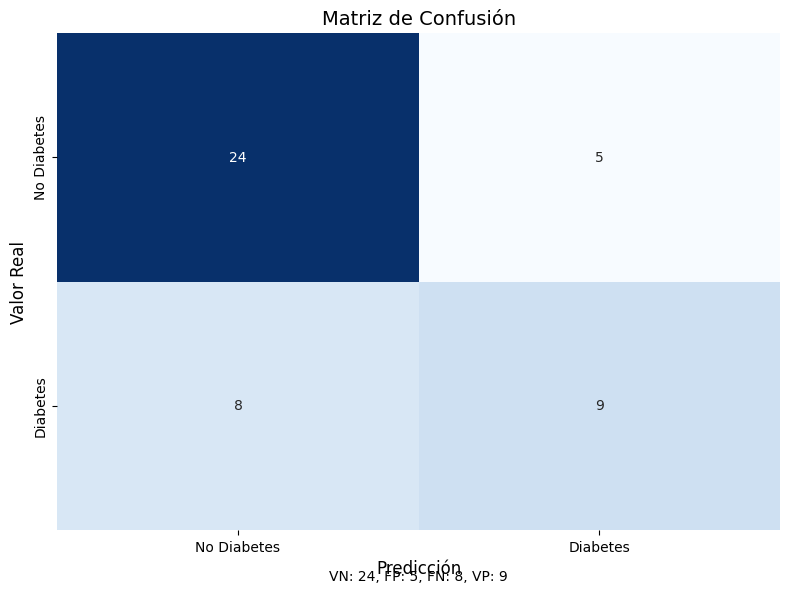

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Extraer los valores de la matriz de confusión
tn, fp, fn, tp = cm.ravel()

print("Matriz de Confusión:")
print(f"Verdaderos Negativos (VN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (VP): {tp}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicción", fontsize=12)
plt.ylabel("Valor Real", fontsize=12)
plt.title("Matriz de Confusión", fontsize=14)

# Añadir texto explicativo
plt.text(0.5, -0.1, f"VN: {tn}, FP: {fp}, FN: {fn}, VP: {tp}",
         ha='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

#### 5.3. Métricas de Clasificación

A partir de la matriz de confusión, podemos calcular varias métricas clave que nos dan una visión más completa del rendimiento del modelo.

## Explicación Detallada de las Métricas

### 1. Accuracy (Exactitud)
**Fórmula:** `(VP + VN) / (VP + VN + FP + FN)`

**Qué mide:** La proporción de predicciones correctas sobre el total de predicciones. Es una métrica general de qué tan bien clasifica el modelo.

**Interpretación:** Un accuracy alto indica que el modelo acierta la mayoría de las veces. Sin embargo, puede ser engañoso en datasets desbalanceados (ej. si el 95% de los pacientes no tienen diabetes, un modelo que siempre predice 'no diabetes' tendría un 95% de accuracy, pero sería inútil).

**Cuándo es importante:** Cuando las clases están balanceadas y el costo de los errores es similar para ambas clases.

### 2. Precision (Precisión)
**Fórmula:** `VP / (VP + FP)`

**Qué mide:** De todas las veces que el modelo predijo la clase positiva (ej. diabetes), ¿cuántas de ellas fueron realmente correctas? Es la capacidad del modelo para no etiquetar como positivo una muestra que es negativa.

**Interpretación:** Una alta precisión es importante cuando el costo de un Falso Positivo es alto (ej. un diagnóstico erróneo de diabetes que lleva a tratamientos innecesarios y estrés en el paciente).

**Cuándo es importante:** Cuando queremos minimizar los falsos positivos. Por ejemplo, en spam detection, no queremos que emails importantes sean marcados como spam.

### 3. Recall (Sensibilidad o Exhaustividad)
**Fórmula:** `VP / (VP + FN)`

**Qué mide:** De todas las muestras que realmente pertenecen a la clase positiva (ej. pacientes con diabetes), ¿cuántas de ellas fueron correctamente identificadas por el modelo? Es la capacidad del modelo para encontrar todas las muestras positivas.

**Interpretación:** Un alto recall es importante cuando el costo de un Falso Negativo es alto (ej. no diagnosticar diabetes a un paciente que sí la tiene, lo que retrasa el tratamiento y puede llevar a complicaciones graves).

**Cuándo es importante:** Cuando queremos minimizar los falsos negativos. Por ejemplo, en diagnósticos médicos, no queremos pasar por alto casos de enfermedad.

### 4. F1-Score
**Fórmula:** `2 * (Precision * Recall) / (Precision + Recall)`

**Qué mide:** Es la media armónica de la precisión y el recall. Proporciona un equilibrio entre ambas métricas.

**Interpretación:** El F1-Score es útil cuando se busca un equilibrio entre precisión y recall, especialmente en datasets desbalanceados. Un valor alto indica que el modelo tiene un buen rendimiento tanto en la identificación de positivos como en la evitación de falsos positivos y negativos.

**Cuándo es importante:** Cuando necesitamos un balance entre precisión y recall, o cuando las clases están desbalanceadas.

### Contexto Médico
En el diagnóstico médico, a menudo se prioriza un alto **recall** para no pasar por alto casos de enfermedad, incluso si eso significa tener algunos falsos positivos. Es mejor hacer pruebas adicionales a un paciente sano que no detectar una enfermedad real.

**¿Qué hace este código?**

Calcula todas las métricas de clasificación importantes y muestra un reporte detallado del rendimiento del modelo.

**Resultado esperado:** Valores numéricos para accuracy, precisión, recall y F1-score, junto con un reporte completo de clasificación.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== MÉTRICAS DE EVALUACIÓN ===")
print(f"Accuracy (Exactitud): {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision (Precisión): {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall (Sensibilidad): {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")

print("\n=== INTERPRETACIÓN ===")
print(f"• De cada 100 predicciones, {accuracy*100:.0f} son correctas (Accuracy)")
print(f"• De cada 100 predicciones de diabetes, {precision*100:.0f} son realmente diabetes (Precision)")
print(f"• De cada 100 pacientes con diabetes, {recall*100:.0f} son detectados (Recall)")
print(f"• El balance entre precisión y recall es {f1*100:.0f}% (F1-Score)")

# Reporte de clasificación completo
print("\n=== REPORTE DETALLADO DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))

=== MÉTRICAS DE EVALUACIÓN ===
Accuracy (Exactitud): 0.7174 (71.74%)
Precision (Precisión): 0.6429 (64.29%)
Recall (Sensibilidad): 0.5294 (52.94%)
F1-Score: 0.5806 (58.06%)

=== INTERPRETACIÓN ===
• De cada 100 predicciones, 72 son correctas (Accuracy)
• De cada 100 predicciones de diabetes, 64 son realmente diabetes (Precision)
• De cada 100 pacientes con diabetes, 53 son detectados (Recall)
• El balance entre precisión y recall es 58% (F1-Score)

=== REPORTE DETALLADO DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

 No Diabetes       0.75      0.83      0.79        29
    Diabetes       0.64      0.53      0.58        17

    accuracy                           0.72        46
   macro avg       0.70      0.68      0.68        46
weighted avg       0.71      0.72      0.71        46



#### 5.4. Validación Cruzada (Cross-Validation)

La **Validación Cruzada** es una técnica utilizada para evaluar la capacidad de generalización de un modelo a un conjunto de datos independiente. Ayuda a evitar el sobreajuste (overfitting) y a obtener una estimación más robusta del rendimiento del modelo.

**¿Por qué es necesaria?**

Si solo evaluamos el modelo en un único conjunto de prueba, la métrica de rendimiento podría ser muy optimista o pesimista, dependiendo de cómo se hayan dividido los datos. La validación cruzada reduce la varianza de la estimación del rendimiento.

**Cómo funciona (ej. K-Fold Cross-Validation):**

1.  El dataset se divide en `k` subconjuntos (folds) de igual tamaño.
2.  Se entrena el modelo `k` veces. En cada iteración:
    *   Un fold se usa como conjunto de prueba.
    *   Los `k-1` folds restantes se usan como conjunto de entrenamiento.
3.  Se registra la métrica de rendimiento en cada iteración.
4.  El rendimiento final del modelo se calcula como el promedio de las `k` métricas registradas.

Esto nos da una estimación más fiable de cómo se comportará el modelo con datos nuevos.

**¿Qué hace este código?**

Realiza validación cruzada con 5 folds para obtener una estimación más robusta del rendimiento del modelo. Esto nos da una idea de qué tan consistente es el modelo.

**Resultado esperado:** Múltiples scores de accuracy y su promedio, mostrando la estabilidad del modelo.

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(LogisticRegression(random_state=42, max_iter=1000),
                           X_scaled, y, cv=5, scoring="accuracy")

print("=== VALIDACIÓN CRUZADA (5-Fold) ===")
print(f"Scores individuales: {[f'{score:.4f}' for score in cv_scores]}")
print(f"Accuracy promedio: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Rango de confianza (95%): [{cv_scores.mean() - 2*cv_scores.std():.4f}, {cv_scores.mean() + 2*cv_scores.std():.4f}]")

# Comparar con el resultado del conjunto de prueba
print(f"\n=== COMPARACIÓN ===")
print(f"Accuracy en conjunto de prueba: {accuracy:.4f}")
print(f"Accuracy promedio en validación cruzada: {cv_scores.mean():.4f}")
diferencia = abs(accuracy - cv_scores.mean())
print(f"Diferencia: {diferencia:.4f} ({'Buena consistencia' if diferencia < 0.05 else 'Revisar posible sobreajuste'})")

=== VALIDACIÓN CRUZADA (5-Fold) ===
Scores individuales: ['0.7419', '0.6774', '0.8000', '0.7000', '0.9000']
Accuracy promedio: 0.7639 ± 0.0798
Rango de confianza (95%): [0.6042, 0.9235]

=== COMPARACIÓN ===
Accuracy en conjunto de prueba: 0.7174
Accuracy promedio en validación cruzada: 0.7639
Diferencia: 0.0465 (Buena consistencia)


### Fase 6: Despliegue (Predicción de un Nuevo Paciente)

En esta fase final, simularemos el uso de nuestro modelo entrenado para hacer una predicción sobre un paciente completamente nuevo. Es importante recordar que los datos del nuevo paciente deben ser preprocesados de la misma manera que los datos de entrenamiento (imputación de nulos, manejo de outliers y escalado).

**¿Qué hace este código?**

Define los datos de un nuevo paciente que queremos evaluar. Estos datos deben estar en el mismo formato que los datos de entrenamiento.

**Resultado esperado:** Un DataFrame con los datos del nuevo paciente listos para ser procesados.

In [ ]:
# Datos de un nuevo paciente (ejemplo)
# Asegúrate de que las columnas estén en el mismo orden que el dataset de entrenamiento
new_patient_data = pd.DataFrame({
    "Pregnancies": [2],
    "Glucose": [140],
    "BloodPressure": [70],
    "SkinThickness": [30],
    "Insulin": [150],
    "BMI": [35.0],
    "DiabetesPedigreeFunction": [0.6],
    "Age": [38]
})

print("=== DATOS DEL NUEVO PACIENTE ===")
print(new_patient_data.T)  # Transponer para mejor visualización

# Mostrar información del paciente
print("\n=== PERFIL DEL PACIENTE ===")
print(f"Mujer de {new_patient_data['Age'].iloc[0]} años")
print(f"Ha estado embarazada {new_patient_data['Pregnancies'].iloc[0]} veces")
print(f"Glucosa: {new_patient_data['Glucose'].iloc[0]} mg/dL")
print(f"Presión arterial: {new_patient_data['BloodPressure'].iloc[0]} mmHg")
print(f"BMI: {new_patient_data['BMI'].iloc[0]}")
print(f"Insulina: {new_patient_data['Insulin'].iloc[0]} mu U/ml")

=== DATOS DEL NUEVO PACIENTE ===
                              0
Pregnancies                 2.0
Glucose                   140.0
BloodPressure              70.0
SkinThickness              30.0
Insulin                   150.0
BMI                        35.0
DiabetesPedigreeFunction    0.6
Age                        38.0

=== PERFIL DEL PACIENTE ===
Mujer de 38 años
Ha estado embarazada 2 veces
Glucosa: 140 mg/dL
Presión arterial: 70 mmHg
BMI: 35.0
Insulina: 150 mu U/ml


#### Preprocesamiento del Nuevo Paciente

Aplicamos las mismas transformaciones que a los datos de entrenamiento:
1.  Manejo de ceros (si aplica, aunque en este ejemplo no hay)
2.  Manejo de outliers (capping) usando los límites aprendidos del dataset de entrenamiento.
3.  Escalado usando el `StandardScaler` que se entrenó con los datos de entrenamiento.

**¿Qué hace este código?**

Aplica el mismo preprocesamiento que se usó en los datos de entrenamiento: manejo de outliers y escalado. Es crucial usar los mismos parámetros que se aprendieron durante el entrenamiento.

**Resultado esperado:** Los datos del nuevo paciente procesados y listos para la predicción.

In [ ]:
# Crear una copia para el preprocesamiento
new_patient_processed = new_patient_data.copy()

print("=== PREPROCESAMIENTO DEL NUEVO PACIENTE ===")

# 1. Manejo de ceros (si los hubiera)
# En este ejemplo no hay ceros, pero es buena práctica verificar
ceros_encontrados = (new_patient_processed == 0).sum().sum()
print(f"Valores cero encontrados: {ceros_encontrados}")

# 2. Aplicar capping de outliers usando los límites del dataset original
print("\nAplicando límites de outliers:")
for col in new_patient_processed.columns:
    # Usar los mismos límites que se calcularon para el dataset de entrenamiento
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    valor_original = new_patient_processed[col].iloc[0]
    new_patient_processed[col] = np.clip(new_patient_processed[col], lower_bound, upper_bound)
    valor_procesado = new_patient_processed[col].iloc[0]

    if valor_original != valor_procesado:
        print(f"{col}: {valor_original:.2f} → {valor_procesado:.2f} (limitado)")
    else:
        print(f"{col}: {valor_original:.2f} (sin cambios)")

# 3. Escalar usando el scaler entrenado
new_patient_scaled = scaler.transform(new_patient_processed)

print(f"\nDatos escalados (primeros 4 valores): {new_patient_scaled[0][:4]}")
print("Preprocesamiento completado.")

=== PREPROCESAMIENTO DEL NUEVO PACIENTE ===
Valores cero encontrados: 0

Aplicando límites de outliers:
Pregnancies: 2.00 (sin cambios)
Glucose: 140.00 (sin cambios)
BloodPressure: 70.00 (sin cambios)
SkinThickness: 30.00 (sin cambios)
Insulin: 150.00 → 140.00 (limitado)
BMI: 35.00 (sin cambios)
DiabetesPedigreeFunction: 0.60 (sin cambios)
Age: 38.00 (sin cambios)

Datos escalados (primeros 4 valores): [-0.6614553   0.83343984 -0.36266053  0.16332681]
Preprocesamiento completado.


#### Predicción Final

Finalmente, usamos el modelo entrenado para predecir si el nuevo paciente tiene diabetes.

**¿Qué hace este código?**

Usa el modelo entrenado para hacer una predicción sobre el nuevo paciente. Proporciona tanto la predicción binaria como la probabilidad asociada.

**Resultado esperado:** Una predicción clara sobre si el paciente tiene diabetes o no, junto con la probabilidad de cada clase.

In [ ]:
# Hacer la predicción
prediction = model.predict(new_patient_scaled)
prediction_proba = model.predict_proba(new_patient_scaled)

# Extraer probabilidades
prob_no_diabetes = prediction_proba[0][0]
prob_diabetes = prediction_proba[0][1]

print("=== RESULTADO DE LA PREDICCIÓN ===")
print(f"Predicción: {'DIABETES' if prediction[0] == 1 else 'NO DIABETES'}")
print(f"\nProbabilidades:")
print(f"• No Diabetes: {prob_no_diabetes:.3f} ({prob_no_diabetes*100:.1f}%)")
print(f"• Diabetes: {prob_diabetes:.3f} ({prob_diabetes*100:.1f}%)")

print(f"\n=== INTERPRETACIÓN CLÍNICA ===")
if prediction[0] == 1:
    print(f"⚠️  El modelo predice que el paciente TIENE DIABETES")
    print(f"   Confianza: {prob_diabetes*100:.1f}%")
    if prob_diabetes > 0.8:
        print(f"   Recomendación: Realizar pruebas confirmatorias inmediatamente")
    elif prob_diabetes > 0.6:
        print(f"   Recomendación: Realizar pruebas adicionales y seguimiento")
    else:
        print(f"   Recomendación: Monitoreo y evaluación adicional")
else:
    print(f"✅ El modelo predice que el paciente NO TIENE DIABETES")
    print(f"   Confianza: {prob_no_diabetes*100:.1f}%")
    if prob_diabetes > 0.3:
        print(f"   Nota: Probabilidad de diabetes no despreciable ({prob_diabetes*100:.1f}%). Considerar seguimiento.")
    else:
        print(f"   Recomendación: Mantener hábitos saludables y chequeos regulares")

print(f"\n⚠️  IMPORTANTE: Esta predicción es solo una herramienta de apoyo.")
print(f"   Siempre consulte con un profesional médico para un diagnóstico definitivo.")

=== RESULTADO DE LA PREDICCIÓN ===
Predicción: DIABETES

Probabilidades:
• No Diabetes: 0.420 (42.0%)
• Diabetes: 0.580 (58.0%)

=== INTERPRETACIÓN CLÍNICA ===
⚠️  El modelo predice que el paciente TIENE DIABETES
   Confianza: 58.0%
   Recomendación: Monitoreo y evaluación adicional

⚠️  IMPORTANTE: Esta predicción es solo una herramienta de apoyo.
   Siempre consulte con un profesional médico para un diagnóstico definitivo.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
